### Student Information
Name: 謝尚哲

Student ID: 114064545

GitHub ID: shangchehsieh

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### Begin Assignment Here

## 1. Data Preparation

In [2]:
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.utils import Bunch
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap
df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')

needed_cols = ["text", "subjectivity", "polarity", "sentiment", "label"]
df = df[needed_cols].copy()

# Make sure each column has the correct data type and valid values
df["text"] = df["text"].astype(str) #all turn to str
df["subjectivity"] = pd.to_numeric(df["subjectivity"], errors="coerce") #all turn to int/float # error="coerce": set NaN when cannot transform
df["polarity"] = pd.to_numeric(df["polarity"], errors="coerce")
df["label"] = pd.to_numeric(df["label"], errors="coerce")  # ground truth: {-1.0, 0.0, 1.0}

# Keep only rows with valid labels
df = df[df["label"].isin([-1.0, 0.0, 1.0])].dropna(subset=["text"]).reset_index(drop=True)

# mapping for labels (-1, 0, 1 -> 0, 1, 2)
label_order = [-1.0, 0.0, 1.0]
categories = ["negative", "neutral", "positive"]
label_to_idx = {lab: i for i, lab in enumerate(label_order)}

# Build a sklearn friendly structure (Bunch)
X_text = df["text"].tolist() # df -> Py list
y = df["label"].map(label_to_idx).to_numpy()

twenty_train = Bunch(
    data=X_text,             # list[str]
    target=y,                # np.ndarray of ints {0,1,2}
    target_names=categories  # ['negative','neutral','positive']
)

X = df[["text", "subjectivity", "polarity","sentiment", "label"]].copy()
X["label_idx"] = X["label"].map(label_to_idx)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aska9\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 2. Data Transformation

### 2.1 Converting Dictionary into Pandas Dataframe

In [3]:
# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X

,text
0,Calls on retards
1,Stunt as in like why did they even make a big ...
2,Seeing lots of red in the ticker.
3,Vision Marine Technologies Inc. is rewriting t...
4,He didn’t say thank you.
...,...
842,Invest now it is going to shoot up tomorrow
843,Where can I read this?
844,"Upgrades, Downgrades\r \r [Stock Analyst Reco..."
845,i sold my puts so i expect cheeto to declare w...


### 2.2 Adding Columns

- Get the key value via `target`

In [4]:
X['sentiment'] = twenty_train.target
X

,text,sentiment
0,Calls on retards,0
1,Stunt as in like why did they even make a big ...,1
2,Seeing lots of red in the ticker.,1
3,Vision Marine Technologies Inc. is rewriting t...,2
4,He didn’t say thank you.,0
...,...,...
842,Invest now it is going to shoot up tomorrow,2
843,Where can I read this?,1
844,"Upgrades, Downgrades\r \r [Stock Analyst Reco...",1
845,i sold my puts so i expect cheeto to declare w...,0


- Get sentiment name from the key of sentiment

In [6]:
X['sentiment_name'] = X.sentiment.apply(lambda t: dmh.format_labels(t, twenty_train))
X

,text,sentiment,sentiment_name
0,Calls on retards,0,negative
1,Stunt as in like why did they even make a big ...,1,neutral
2,Seeing lots of red in the ticker.,1,neutral
3,Vision Marine Technologies Inc. is rewriting t...,2,positive
4,He didn’t say thank you.,0,negative
...,...,...,...
842,Invest now it is going to shoot up tomorrow,2,positive
843,Where can I read this?,1,neutral
844,"Upgrades, Downgrades\r \r [Stock Analyst Reco...",1,neutral
845,i sold my puts so i expect cheeto to declare w...,0,negative


### 2.3 Familiarizing yourself with the Data - fetch records belonging to "posivive" and query every 10th record. Only show the first 5 records.

In [5]:
X[X["sentiment_name"] == "positive"][::10][0:5]

,text,sentiment,sentiment_name
3,Vision Marine Technologies Inc. is rewriting t...,2,positive
78,I think it’s gonna work itself out. I bought t...,2,positive
168,The obvious can also be refreshing from CNBC: ...,2,positive
219,Same. Back to break even after that last rip b...,2,positive
319,Etrade has a feed of news articles about how r...,2,positive


## 3. Data Mining using Pandas

### 3.1 Missing Values

- `.isnull()`: tranformed our table into the True/False table
- `.check_missing_values()`: looks through each field (attribute or column) in the dataset and counts how many missing values were found.

In [134]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,sentiment,sentiment_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


- I try to calculate the missing values in every record instead of every column.

In [135]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

- Insert "Dummy Series"

In [136]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "sentiment"])

In [137]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,sentiment,sentiment_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


-  drop the record with missing that we just added

In [138]:
X.dropna(inplace=True)

In [139]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,sentiment,sentiment_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### 3.2 Dealing with Duplicate Data

In [38]:
sum(X.duplicated())

23

In [39]:
len(X) #before eliminating duplicate data

847

In [40]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [41]:
len(X) #after

813

## 4. Data Preprocessing
- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

### 4.1 Sampling

In [42]:
X_sample = X.sample(n=400) #random state

In [43]:
len(X_sample)

400

In [44]:
X_sample[0:4]

,text,sentiment,sentiment_name
549,CGC,1,neutral
281,What are we gonna call it when Wendy's is gone.,1,neutral
450,I’ve been looking into them.,1,neutral
230,The US has made it clear that it has no allies...,0,negative


- To generate some visualizations, we are going to use `matplotlib` python library. With `matplotlib`, things are faster and compatability-wise it may just be the best visualization library for visualizing content extracted from dataframes and when using Jupyter notebooks. 

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
categories

['negative', 'neutral', 'positive']

- print `X` dataframe and its barchart

sentiment_name
neutral     423
negative    315
positive    109
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment_name'>

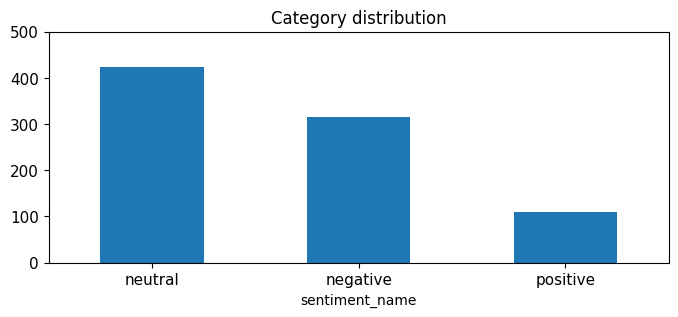

In [17]:
print(X.sentiment_name.value_counts())

# plot barchart for X
X.sentiment_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 500],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

- print `X_sample` dataframe and its barchart

sentiment_name
neutral     199
negative    152
positive     49
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment_name'>

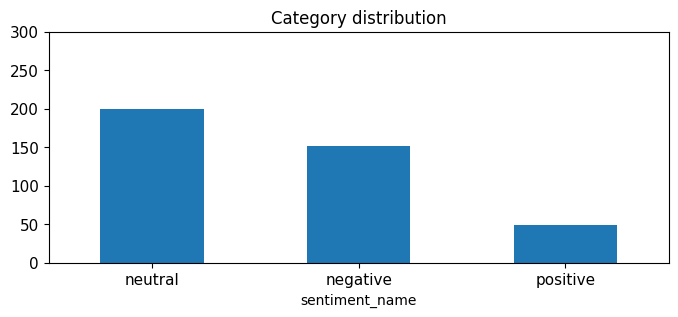

In [48]:
print(X_sample.sentiment_name.value_counts())

# plot barchart for X
X_sample.sentiment_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 300],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

- Instead of hardcoding the maximum value for y, use `.value_counts()` and `.max()` to automate it

sentiment_name
neutral     199
negative    152
positive     49
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment_name'>

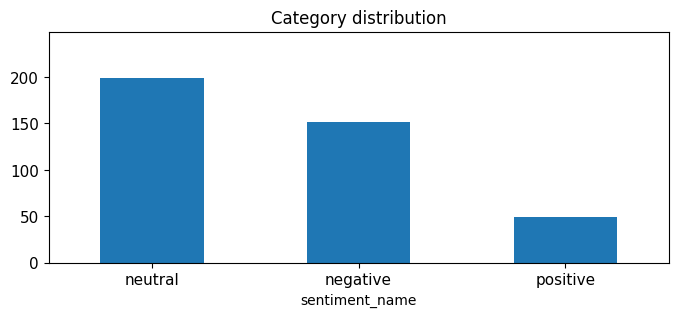

In [49]:
print(X_sample.sentiment_name.value_counts())

# plot barchart for X
X_sample.sentiment_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, X_sample.sentiment_name.value_counts().max()+50],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

- Do a **side-by-side comparison** of the distribution between the two datasets

<Axes: title={'center': 'Category distribution'}, xlabel='sentiment_name'>

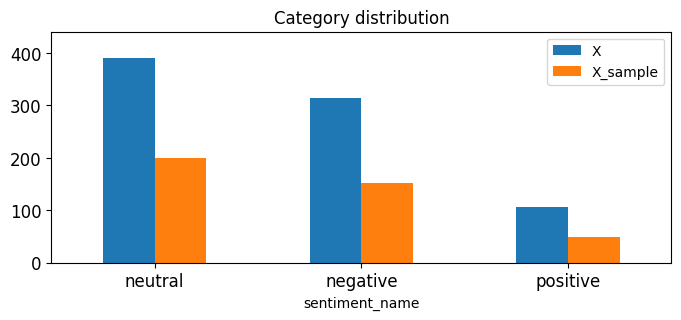

In [50]:
df_compare = pd.DataFrame({
    'X': X.sentiment_name.value_counts(), 
    'X_sample': X_sample.sentiment_name.value_counts()
})

# plot side-by-side barchart
df_compare.plot(kind = 'bar',
    title = 'Category distribution',
    ylim = [0, X.sentiment_name.value_counts().max()+50],
    rot = 0, fontsize = 12, figsize = (8,3))

### 4.2 Feature Creation

- `Feature Engineering` :create some features from the text field, but we are still not sure what kind of features we want to create. We can think of an interesting problem we want to solve, or something we want to analyze from the data, or some questions we want to answer.

In [25]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aska9\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\aska9\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [51]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [52]:
X[0:4]

,text,sentiment,sentiment_name,unigrams
0,Calls on retards,0,negative,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big ...,1,neutral,"[Stunt, as, in, like, why, did, they, even, ma..."
2,Seeing lots of red in the ticker.,1,neutral,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Vision Marine Technologies Inc. is rewriting t...,2,positive,"[Vision, Marine, Technologies, Inc., is, rewri..."


In [53]:
list(X[0:1]['unigrams'])

[['Calls', 'on', 'retards']]

### 4.3 Feature subset selection

- Feature extration with `CountVectorizer` from sklearn
- `CountVecorizer`: 1.tokenize and turn to all lowercase 2. vocabulary **3. calculate frequency**

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #詞頻矩陣(a sparse matrix)
print(X_counts[0])

  (np.int32(0), np.int32(689))	1
  (np.int32(0), np.int32(2682))	1
  (np.int32(0), np.int32(3220))	1


-  Transformed the text into a term-document matrix.
-  Create an `analyzer`(aka tokenizer, which produces the word frequency vector for each document) 

In [55]:
analyze = count_vect.build_analyzer() #build analyzer with CountVectorizer
analyze(X.text[0]) # "Calls on retards"

['calls', 'on', 'retards']

- Check the **shape** of this document matrix

In [56]:
X_counts.shape

(813, 4313)

- Obtain the **feature names**

In [57]:
count_vect.get_feature_names_out()[0:20]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100',
       '1000', '10000', '100k', '100x', '10k', '10ks', '10yr', '11',
       '116', '118'], dtype=object)

- From sparse array to normal array
- `.toarray()`: transform the matrix to a normal Numpy array
- After doing `.toarray()`, each row corresponds to a document, and each column corresponds to a token in CountVectorizer’s vocabulary.
    If there is a **positive integer** at some position, it represents the **frequency of that token in the corresponding document**.

In [58]:
X_counts[0:5, 0:20].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

For example, the fourth record contains a `3`, so we can deduce that this article appears `116` terms for 3 times.

#### 4.3.1 Visualization - Heat map

In [59]:
# x: first 20 features
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
# y: first 20 document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
# z: X_counts[how many documents, how many terms]
plot_z = X_counts[0:20, 0:20].toarray()
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

#### 4.3.2 Visualize the heat map with seaborn
- Advantages: 1. aesthetics / 2.  has some built-in plots that matplotlib does not support

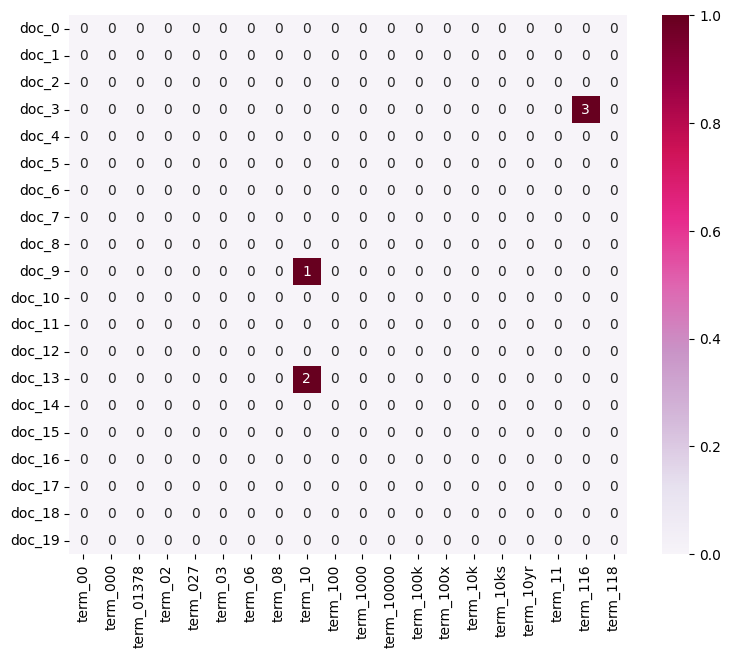

In [60]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

#### 4.3.3 transform into a more informative representation (corresponding to ex11)

- Given that **the announcement posted on 24 Sep**. ,I should deal with the sparse matrix above
- To deal with this, we should **customize the vocabulary to include the top-k most frequent tokens across all documents.**

- Get the frequencies (via term_counts) and their token names (via feature_names)

In [61]:
# Use X_counts / count_vect I've defined above
term_counts = np.asarray(X_counts.sum(axis=0)).ravel()
feature_names = count_vect.get_feature_names_out()

- Find out the indexs and terms of top-k most frequent tokens

In [62]:
topk_idx = np.argsort(term_counts)[::-1][:20]
topk_terms = feature_names[topk_idx]

- Define a new CountVectorizer and regenerate a new document matrix

In [63]:
count_vect_topk = CountVectorizer(vocabulary=topk_terms) 
X_counts_topk = count_vect_topk.fit_transform(X["text"])

In [64]:
#Define x,y,z
plot_x = ["term_" + str(i) for i in count_vect_topk.get_feature_names_out()[:20]]
plot_y = ["doc_" + str(i) for i in list(X.index)[:20]]
plot_z = X_counts_topk[:20, :20].toarray()

In [65]:
#Build the dataframe
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

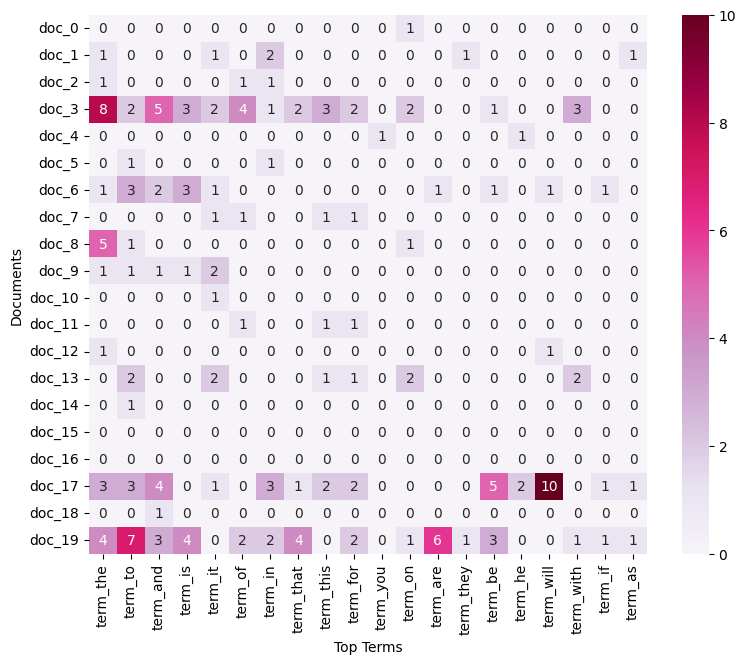

In [66]:
# Plot heatmap
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 annot=True,    # numbers
                 fmt="d",       # present in int
                 cbar=True)     # color bar
ax.set_xlabel("Top Terms")
ax.set_ylabel("Documents")
plt.show()

Although this matrix doesn't look so sparse anymore, it still has lots of zero terms. I think it's because we ignored the documents which were chose randomly in top20 order. Therefore, to fix this problem, I decide to **select the top20 longest documents along with the top-k most frequent tokens across all documents.** I think it's an awesome combo!

#### Adjusted: the top20 longest documents & the top-k most frequent tokens

- select the top20 longest documents

In [72]:
doc_len = np.asarray(X_counts_topk.sum(axis=1)).ravel()  # counts of each document
top_docs = np.argsort(doc_len)[::-1][:20]  # select top20
top_terms = np.arange(min(20, X_counts_topk.shape[1]))

- Construct the label x,y,z

In [73]:
terms_all = count_vect_topk.get_feature_names_out()
plot_x = [f"term_{t}" for t in terms_all[top_terms]]
plot_y = [f"doc_{i}" for i in top_docs]
plot_z = X_counts_topk[top_docs[:, None], top_terms].toarray()

- Plot heatmap

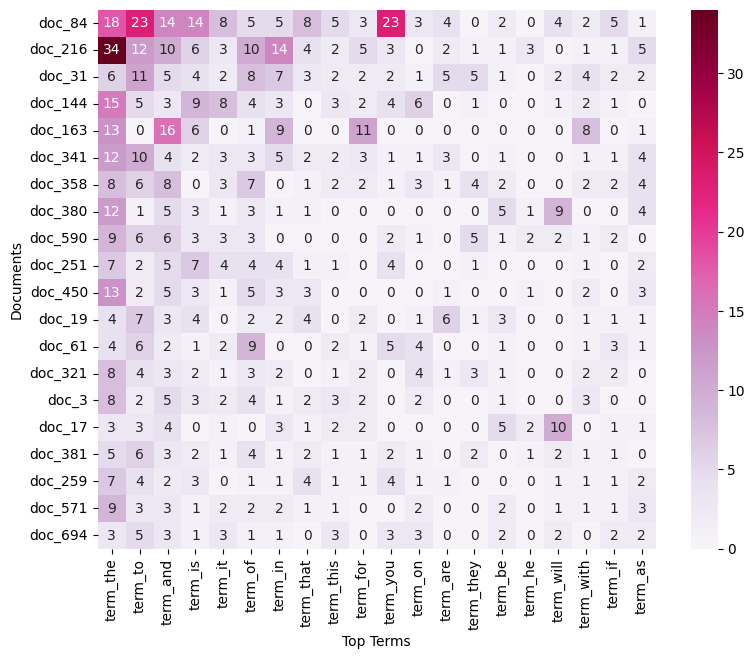

In [74]:
# Plot heatmap
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 annot=True,    # numbers
                 fmt="d",       # present in int
                 cbar=True)     # color bar
ax.set_xlabel("Top Terms")
ax.set_ylabel("Documents")
plt.show()

### 4.4 Attribute Transformation - Transform Text Data

- Compute **the sum of each column** in the document matrix

In [177]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [178]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [179]:
term_frequencies[0] #sum of first term: 00

np.int64(4)

#### 4.4.1 Barplot with the first 100 terms frequencies

C:\Users\aska9\AppData\Local\Temp\ipykernel_35976\3617402877.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



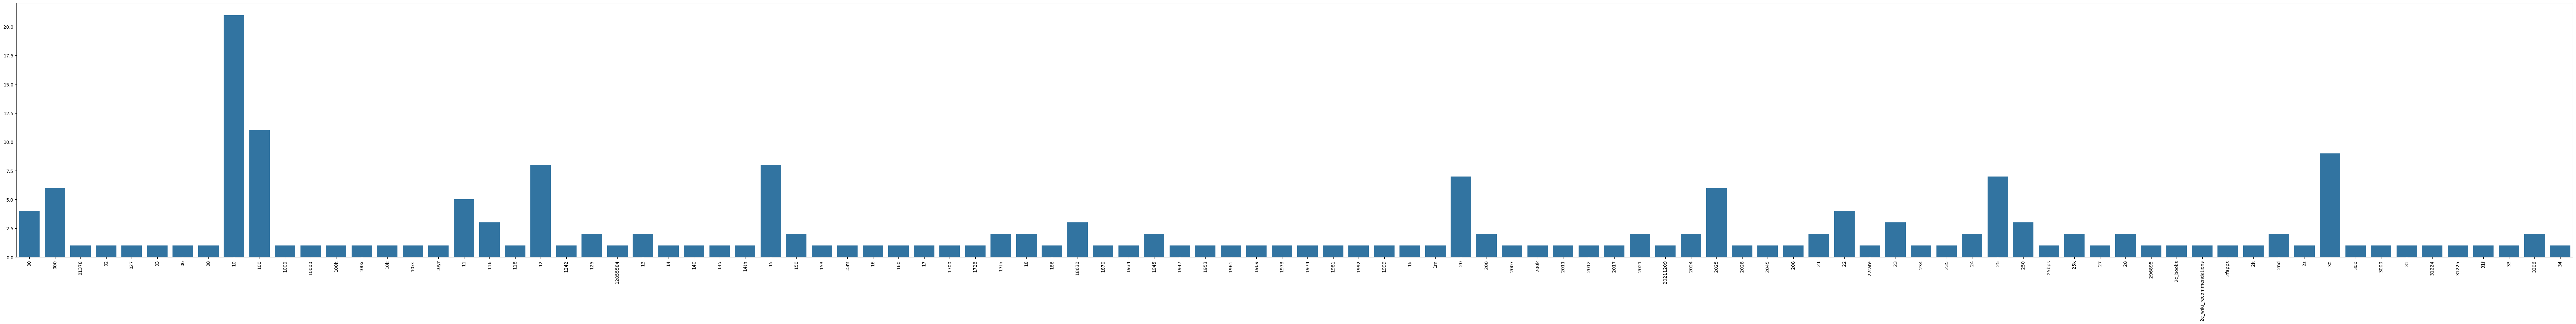

In [181]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:100], 
            y=term_frequencies[:100])
g.set_xticklabels(count_vect.get_feature_names_out()[:100], rotation = 90);

#### 4.4.2 Sort in **alphabetical order**
- use `plotly` to have a better visualization

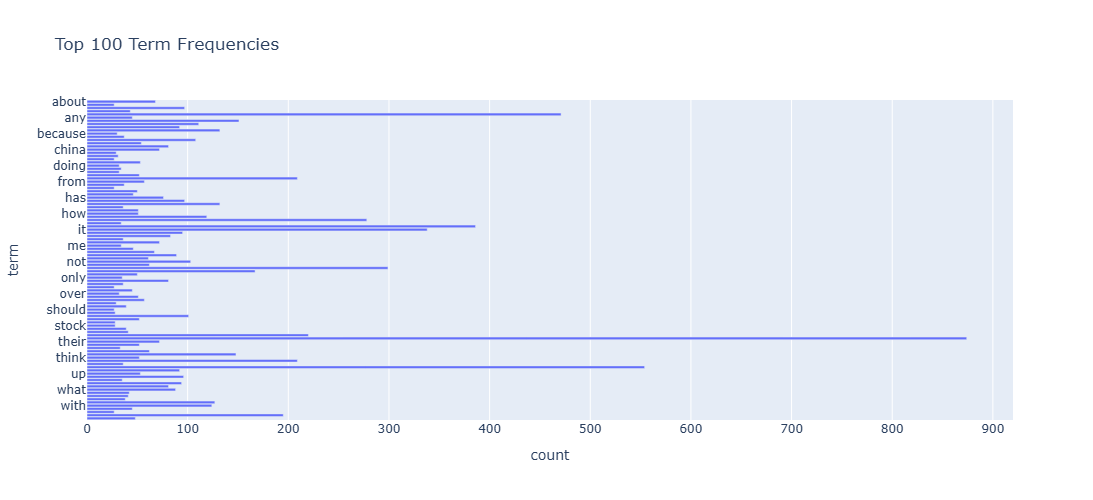

In [194]:
import plotly.express as px

# 1. compute the term frequency
term_counts = np.asarray(X_counts.sum(axis=0)).ravel()
feature_names = count_vect.get_feature_names_out()

# 2. build dataframe
df = pd.DataFrame({"term": feature_names, "count": term_counts})
df_top = df.sort_values("count", ascending=False).head(100)

# 3. plot barchart with plotly
fig = px.bar(df_top.sort_values("term"), 
             x="count", y="term",
             orientation="h",
             title="Top 100 Term Frequencies")

fig.update_layout(yaxis=dict(autorange="reversed"))
fig.update_layout(height=500)
fig.show()

#### 4.4.3 Sort in **frequency order**
It turns out to be a **long tail**

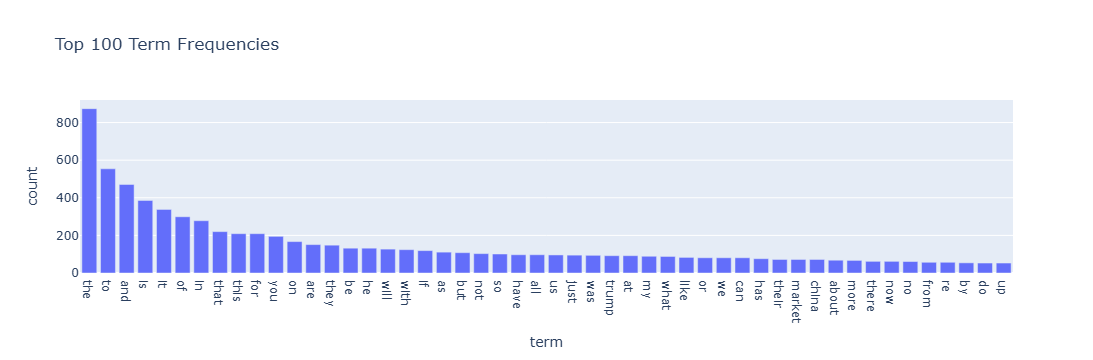

In [195]:
# Pick top 100 terms and sort them from large to small
df_top = df.sort_values("count", ascending=False).head(50)

fig = px.bar(df_top,
             x="term", y="count",
             title="Top 100 Term Frequencies")

# Ensure the order on x-axis is truly ordered by frequency instead of in alphabetical order
fig.update_xaxes(categoryorder='total descending')
fig.show()

#### 4.4.4 Use `log()` function to reconstruct the barplot

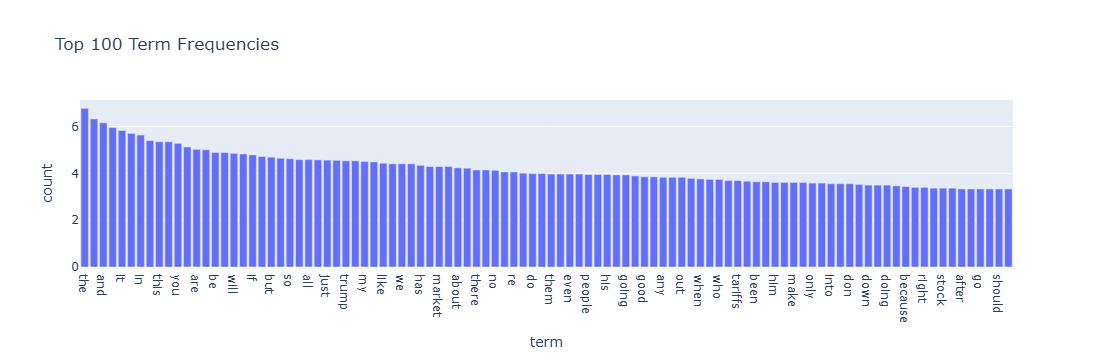

In [197]:
# log
term_counts_log = np.log1p(term_counts)
df = pd.DataFrame({"term": feature_names, "count": term_counts_log})
df_top = df.sort_values("count", ascending=False).head(100)

fig = px.bar(df_top,
             x="term", y="count",
             title="Top 100 Term Frequencies")

# Ensure the order on x-axis is truly ordered by frequency instead of in alphabetical order
fig.update_xaxes(categoryorder='total descending')
fig.show()

- Conclusion: After applying the log transformation, I found that **the difference between high-frequency and low-frequency terms becomes much smaller**, which makes the visualization **easier to read**.

# Phase 2

In [ ]:
### Begin Assignment Here

### 5. Finding frequent patterns

#### 5.1 Modify our document-term matrix to be able to work for each category

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

#Create separate DataFrames for each category
categories = X['sentiment_name'].unique() 
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    # Select items belonging to their categories
    category_dfs[category] = X[X['sentiment_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
     
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

- the number of unique words per category based on the column number in the new dataframe

In [11]:
categories

array(['negative', 'neutral', 'positive'], dtype=object)

In [52]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=0 #0: negative(315), 1:neutral(423), 2:positive(109)
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category negative:


,000,02,03,10,100,1000,10000,11,12,13,...,years,yet,yields,yippee,yo,you,your,yourselves,youtube,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
311,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 5.2 Filter some outliers out of the dataframe
- According to the barchart below, we can see that most of the words appear very infrequently across the entire dataset
- **Very rare words** or **extremely common words ('the', 'to', 'and' in this example)** don’t usually give us much useful information
- We'll **remove the bottom 1% of the least frequent words and the top 5% of the most frequent ones.** This helps us focus on words that might reveal more valuable patterns.

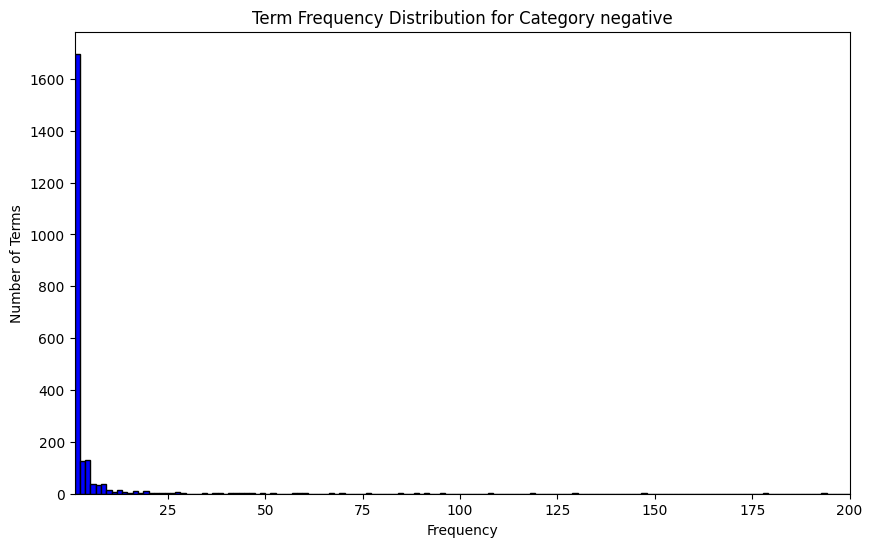

In [29]:
# Sum over all documents to get total frequency for each word
category_number=0 #0~2
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=300, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

- Find top 5%

In [41]:
category_number=0 #0~2
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: negative
Number of terms in top 5%: 109
Filtered terms: ['the', 'to', 'and', 'is', 'it', 'of', 'in', 'that', 'this', 'he', 'will', 'for', 'you', 'be', 'are', 'trump', 'they', 'us', 'on', 'as', 'so', 'not', 'all', 'have', 'china', 'but', 'has', 'just', 'we', 'what', 'if', 'with', 'was', 'at', 'his', 'can', 'their', 'even', 'about', 'or', 'like', 'no', 'there', 'people', 'my', 'market', 'more', 'him', 'them', 'think', 'now', 'going', 'money', 'one', 're', 'make', 'how', 'would', 'do', 'an', 'down', 'out', 'than', 'economy', 'from', 'tariffs', 'up', 'other', 'by', 'then', 'when', 'get', 'over', 'who', 'some', 'doing', 'doesn', 'been', 'trade', 'fuck', 'don', 'see', 'why', 'still', 'only', 'time', 'any', 'because', 'really', 'good', 'world', 'our', 'wants', 'xi', 'american', 'point', 'go', 'back', 'your', 'never', 'much', 'could', 'most', 'everyone', 'shit', 'me', 'literally', 'after', 'these']


In [42]:
sorted_counts #We can see the frequencies sorted in a descending order

array([409, 231, 193, ...,   1,   1,   1])

- Find bottom 1%

In [47]:
category_number=0 #0~2
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: negative
Number of terms in bottom 1%: 21
Filtered terms: ['200', '200k', '2011', '2021', '2025', 'ya', 'yea', 'yields', '1934', '1947', '1953', '1961', '1969', '1973', '1974', '1999', 'woefully', 'woke', '150', '16', '160']


In [48]:
sorted_counts #We can see the frequencies sorted in an ascending order

array([  1,   1,   1, ..., 193, 231, 409])

- Filter them out of the dataframe

In [51]:
category_number=0

# Filter the bottom 1% and top 5% words
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category negative we filter the following words:
Bottom 1.0% words: 
200         1
200k        1
2011        1
2021        1
2025        1
ya          1
yea         1
yields      1
1934        1
1947        1
1953        1
1961        1
1969        1
1973        1
1974        1
1999        1
woefully    1
woke        1
150         1
16          1
160         1
dtype: int64
Top 5.0% words: 
these         11
after         11
literally     12
me            12
shit          12
            ... 
it           147
is           178
and          193
to           231
the          409
Length: 109, dtype: int64

For category neutral we filter the following words:
Bottom 1.0% words: 
betrayals      1
winners        1
wins           1
winter         1
wipe           1
pop            1
wish           1
wit            1
pool           1
within         1
politicians    1
wm             1
wms            1
woke           1
harris         1
women          1
policies       1
legit          1
poised    

,000,02,03,10,100,1000,10000,11,12,13,...,x200b,yeah,year,years,yet,yippee,yo,yourselves,youtube,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
311,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### >>> **Exercise 16:** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

#### Differences
When focusing on the top 5% words for each sentiment category, the vocabulary **reflects distinct thematic and emotional tendencies:**
- **Negative** – includes emotionally charged or informal terms such as **shit and literally**, showing stronger subjective or expressive tone.
- **Neutral** – contains **topic-related words** such as portfolio, buy, and lower, indicating more factual, analytical, or market-oriented language.
- **Positive** – features **optimistic or evaluative terms** like good, market, technology, and lithium, suggesting uplifting or promotional expressions.

#### Similarities
- Across all categories, the **top 5%** lists share many common function words such as `the`, `to`, `and`, `is`, `it`.
- Similarly, the **bottom 1%** words typically consist of extremely rare terms or unique identifiers that occur only once, including **numbers, proper nouns, or uncommon starting words (ya, yea, yields, woke)**.

#### 5.3 Look into the stats of our newly created transactional databases
We will observe the following:
- **Database Size**: Total count of transactions.
- **Number of Items**: Total count of unique items available across all transactions.
- **Minimum Transaction Size**: Smallest number of items in any transaction.
- **Average Transaction Size**: Mean number of items per transaction.
- **Maximum Transaction Size**: Largest number of items in a transaction.
- **Standard Deviation of Transaction Size**
- **Variance in Transaction Sizes**:
- **Sparsity**: Indicates the proportion of possible item combinations that do not occur, with values close to 1 showing high levels of missing combinations.

With regards to the graphs we will have: 

- **Item Frequency Distribution**
    - Y-axis (Frequency): Number of transactions an item appears in.
    - X-axis (Number of Items): Items ranked by frequency.

- **Transaction Length Distribution**
    - Y-axis (Frequency): Occurrence of transaction lengths.
    - X-axis (Transaction Length): Number of items per transaction.

#### Item Frequency Distribution / Transaction Length Distribution

<span style="color:red">Different from Lab1-Master, these categories exist in a csv file so we should separately save as `negative`, `neutral`, `positive` csv files for the sake of implementations afterwards.</span>

In [16]:
import pandas as pd
import helpers.data_mining_helpers as dmh
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stop = set(ENGLISH_STOP_WORDS)

X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns=['text'])
X['sentiment'] = twenty_train.target
X['sentiment_name'] = X.sentiment.apply(lambda t: dmh.format_labels(t, twenty_train))

for sentiment, grp in X.groupby("sentiment_name", sort=False):
    tokens_series = (
        grp["text"].fillna("")
        .str.lower()
        .str.replace(r"[^a-z\s]", "", regex=True)
        .str.split()
        .apply(lambda toks: [w for w in toks if len(w) >= 3 and w not in stop])
        .apply(lambda toks: sorted(set(toks)))
    )

    lines = tokens_series.apply(lambda toks: "\t".join(toks))
    out_path = f"td_freq_db_{sentiment}.csv"
    lines.to_csv(out_path, index=False, header=False)
    print(f"Saved {out_path}")

Saved td_freq_db_negative.csv
Saved td_freq_db_neutral.csv
Saved td_freq_db_positive.csv


- Plot Item Frequency Distribution graph and Transaction Length Distribution graph

Database size (total no of transactions) : 315
Number of items : 1915
Minimum Transaction Size : 1
Average Transaction Size : 11.631746031746031
Maximum Transaction Size : 118
Standard Deviation Transaction Size : 12.412651321308797
Variance in Transaction Sizes : 154.5645940754221
Sparsity : 0.9939259811844668


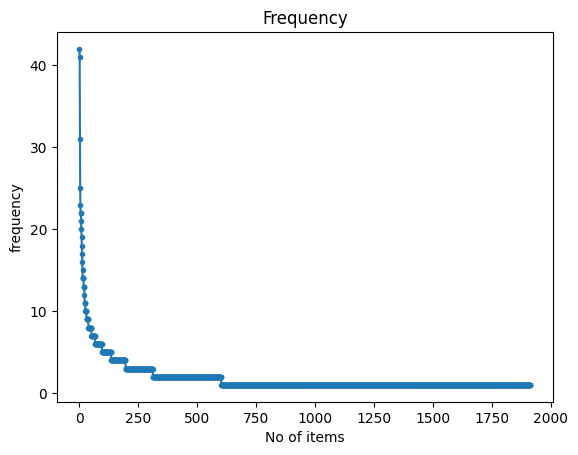

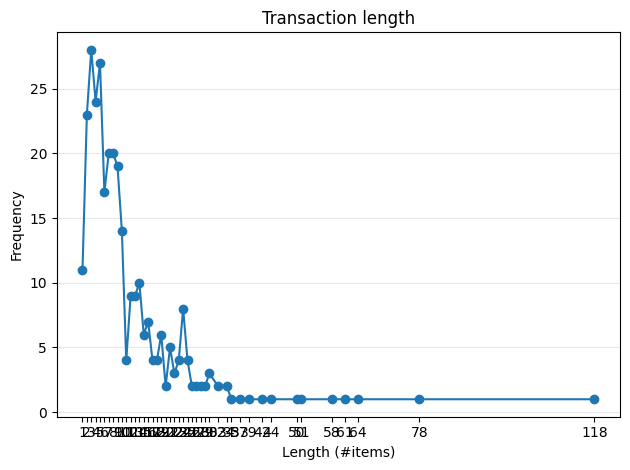

In [17]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_negative.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 423
Number of items : 2379
Minimum Transaction Size : 1
Average Transaction Size : 10.598108747044916
Maximum Transaction Size : 181
Standard Deviation Transaction Size : 17.45048235678968
Variance in Transaction Sizes : 305.2409442819849
Sparsity : 0.9955451413421417


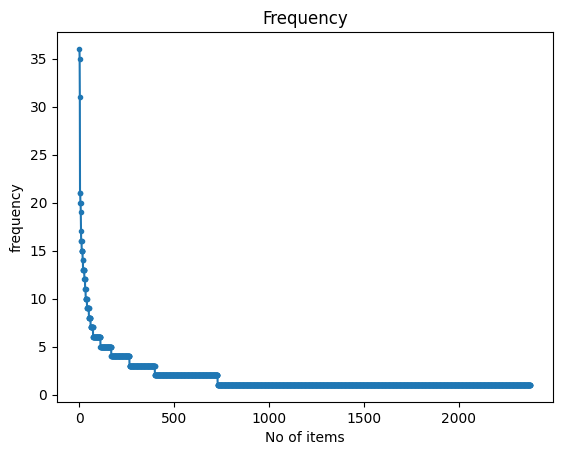

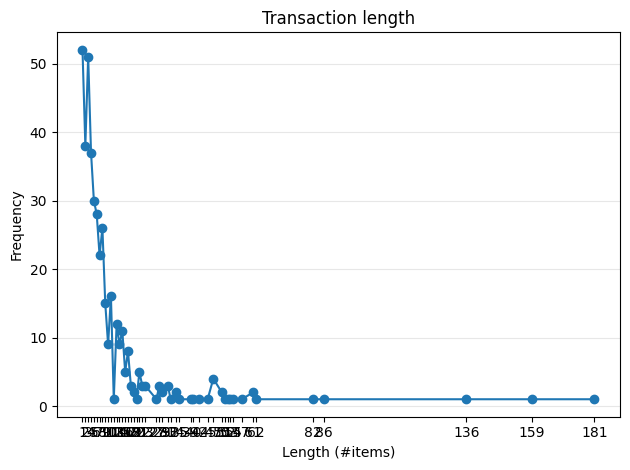

In [18]:
obj = tds.TransactionalDatabase('td_freq_db_neutral.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 109
Number of items : 966
Minimum Transaction Size : 1
Average Transaction Size : 12.1651376146789
Maximum Transaction Size : 86
Standard Deviation Transaction Size : 15.367375046075704
Variance in Transaction Sizes : 238.34284743459057
Sparsity : 0.9874066898398769


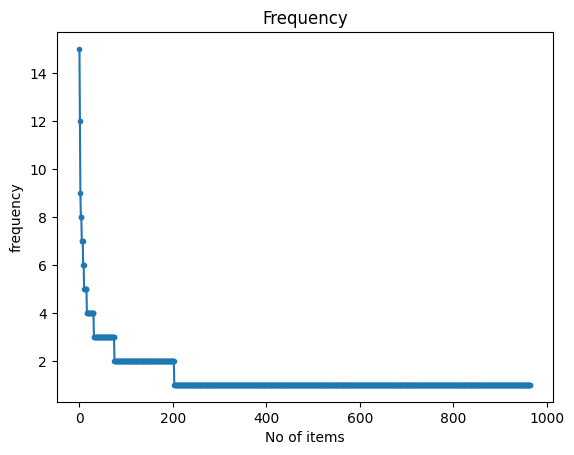

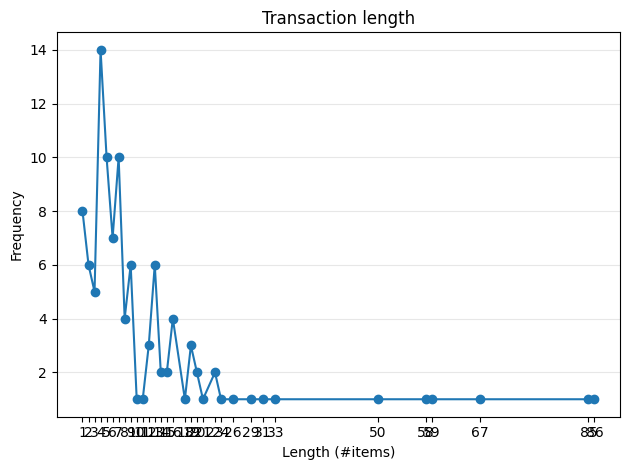

In [19]:
obj = tds.TransactionalDatabase('td_freq_db_positive.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

#### 5.4 Use the FPGrowth algorithm from PAMI
- set a minimum support threshold (minSup) for finding frequent patterns
- **Item Frequency**: The first graph shows that **most items don't appear very often in transactions**. There's a sharp drop in how frequently items appear, which means our data has many items that aren't used much.

- **Transaction Length**: The second graph shows that **most transactions involve a small number of items**. The most common transaction sizes are small, which matches our finding that the dataset does not group many items together often.
- By setting minSup at 90, we focus on combinations of items that show up in these smaller, more common transactions.

In [10]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_negative.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_negative= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_negative))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 41
Runtime: 0.02410411834716797


In [11]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_neutral.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_neutral= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_neutral))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 52
Runtime: 0.022922754287719727


In [12]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile='td_freq_db_positive.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_positive= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_positive))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 3
Runtime: 0.021578311920166016


#### >>> **Exercise 17:** 

- **MaxFPGrowth** w/ threshold=3, 6, 9
- Comparison: MaxFPGrowth can be faster than FPGrowth in minSup=9

In [25]:
from PAMI.frequentPattern.maximal import MaxFPGrowth as maxmod

def run_maxfp(iFile, minSup):
    obj = maxmod.MaxFPGrowth(iFile=iFile, minSup=minSup)
    obj.mine()
    df = obj.getPatternsAsDataFrame()
    rt = obj.getRuntime()
    return df, rt

m3_df, m3_rt = run_maxfp('td_freq_db_negative.csv', 3)
m6_df, m6_rt = run_maxfp('td_freq_db_negative.csv', 6)
m9_df, m9_rt = run_maxfp('td_freq_db_negative.csv', 9)

print('minSup=3  -> Total No of patterns:', len(m3_df), ', run time:', m3_rt)
print('minSup=6  -> Total No of patterns:', len(m6_df), ', run time:', m6_rt)
print('minSup=9  -> Total No of patterns:', len(m9_df), ', run time:', m9_rt)


Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
minSup=3  -> Total No of patterns: 394 , run time: 0.0
minSup=6  -> Total No of patterns: 100 , run time: 0.013500213623046875
minSup=9  -> Total No of patterns: 37 , run time: 0.0027790069580078125


- **FAE Top-K** w/ k=500, 1000, 1500:
- Comparison: FAE Top-K is the fastest algorithm in `comp.graphics` category

In [22]:
from PAMI.frequentPattern.topk import FAE as topk
seperator=' '
def run_fae_topk(iFile, k):
    obj = topk.FAE(iFile=iFile, k=k, sep=seperator)
    obj.mine()
    df = obj.getPatternsAsDataFrame()
    rt = obj.getRuntime()
    return df, rt

t500_df, t500_rt   = run_fae_topk('td_freq_db_negative.csv', 500)
t1000_df, t1000_rt = run_fae_topk('td_freq_db_negative.csv', 1000)
t1500_df, t1500_rt = run_fae_topk('td_freq_db_negative.csv', 1500)

print('k=500   -> Total No of patterns:', len(t500_df), ', run time:', t500_rt)
print('k=1000  -> Total No of patterns:', len(t1000_df), ', run time:', t1000_rt)
print('k=1500  -> Total No of patterns:', len(t1500_df), ', run time:', t1500_rt)

 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
k=500   -> Total No of patterns: 314 , run time: 0.015996694564819336
k=1000  -> Total No of patterns: 314 , run time: 0.010009765625
k=1500  -> Total No of patterns: 314 , run time: 0.011720657348632812


### 6. Dimensionality Reduction

In [14]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_negative, frequentPatternsDF_neutral, frequentPatternsDF_positive]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                  Patterns  Support
52                   stock       21
51         stockbuyvestcom       19
17                 economy       17
49                   today       16
48                    does       16
46                     did       15
47                   price       15
45                  stocks       14
44                    year       14
16                  doesnt       14
15                    fuck       14
14                   trade       14
42                   years       13
41                   right       13
13                     hes       13
43                 updated       13
40                    know       12
38                 company       12
53           stock\tmarket       12
39                     new       12
12                   point       12
10                    shit       11
36                   lower       11
9                literally       11
11                  really       11
37                    look       11
35                  silver  

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,01378,02,027,03,06,08,10,100,...,sure,great,said,got,news,way,companies,reddit,long,weekly
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 6.1 (linear) PCA / (non-linear) t-SNE, UMAP

In [34]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [35]:
print(X_pca_tdm.shape)
print(X_tsne_tdm.shape)
print(X_umap_tdm.shape)

(847, 2)
(847, 2)
(847, 2)


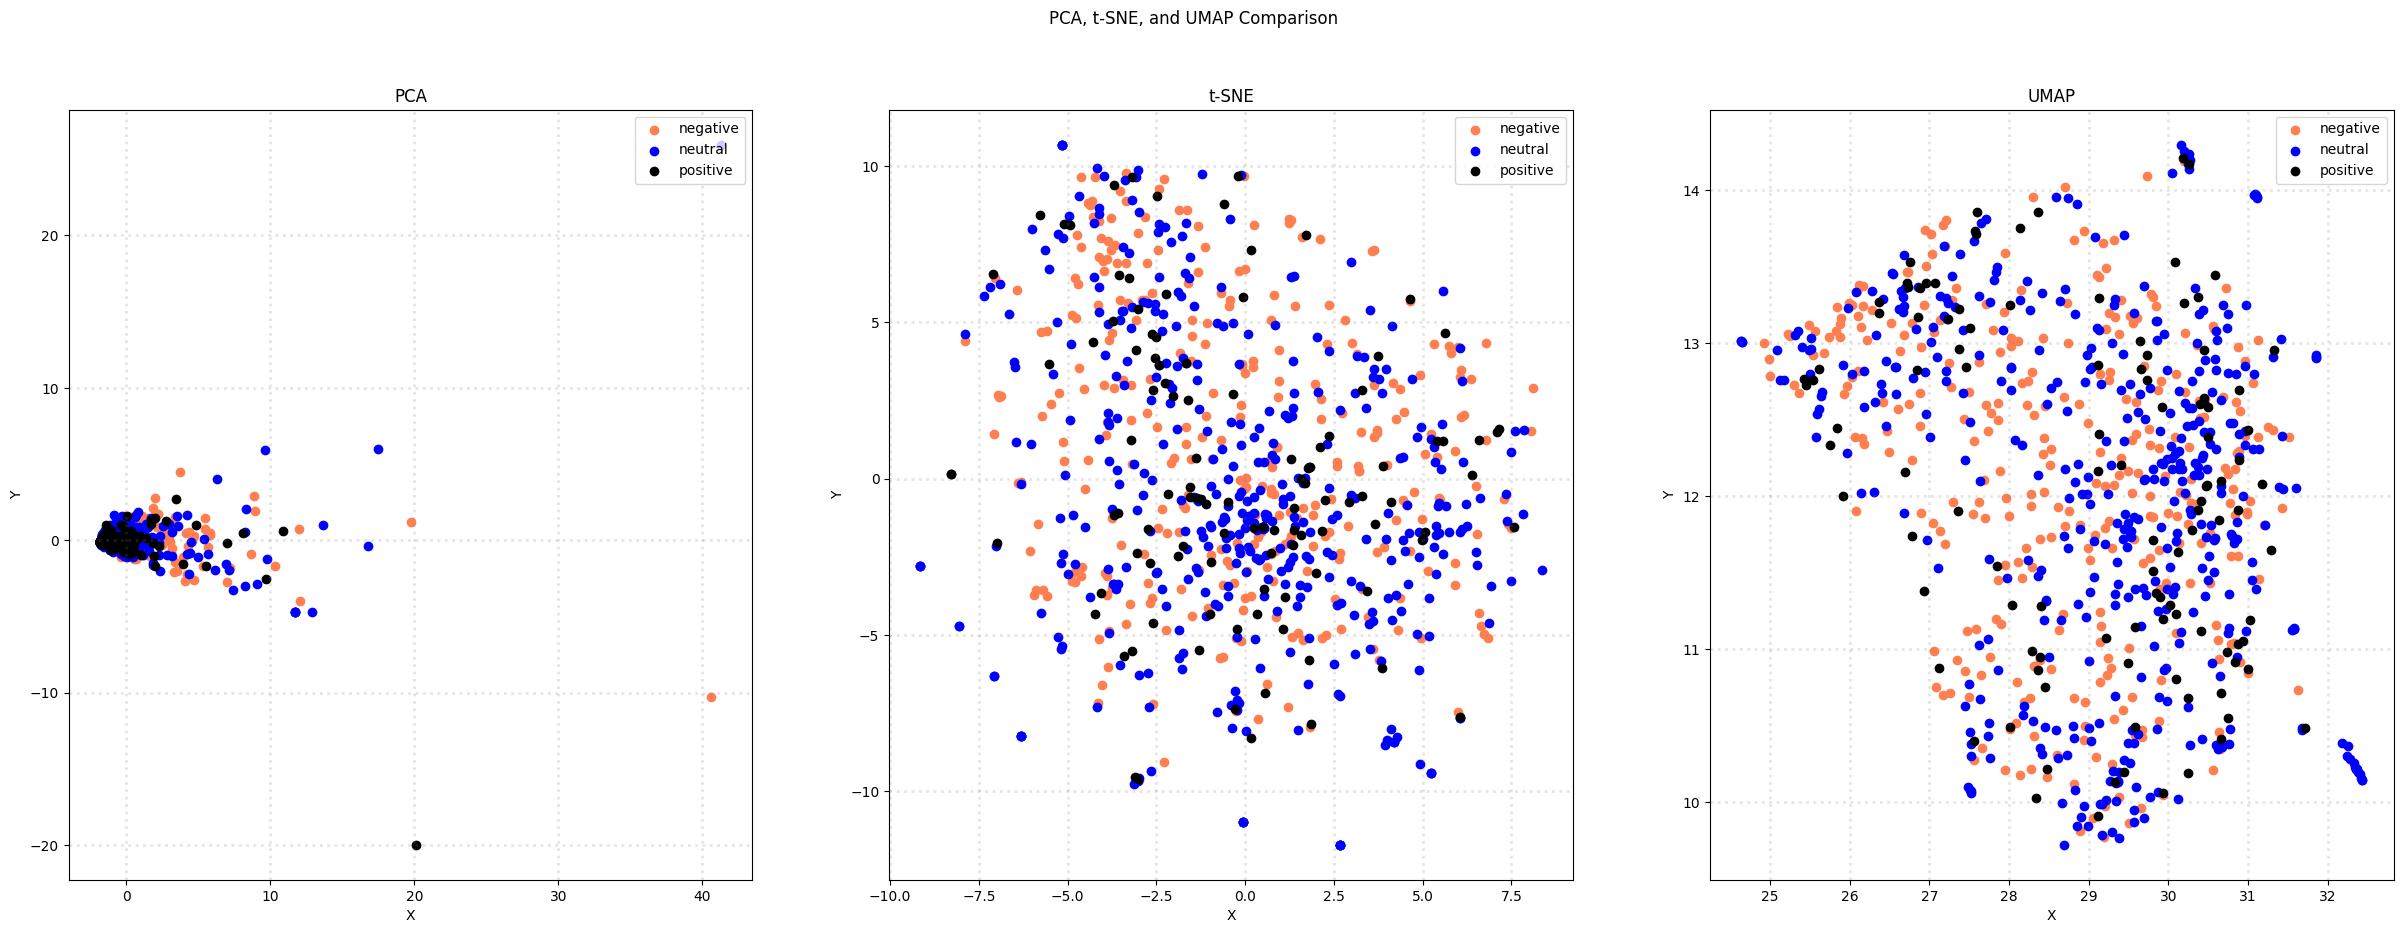

In [38]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment_name'] == category].T[0]
        ys = X_reduced[X['sentiment_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In my dataset, **the PCA, t-SNE, and UMAP projections did not exhibit clear class separation.** Particularly, in the UMAP plot, **unlike Lab1-Master's ones which appear more like linear** ,the distribution appears scattered and non-linear.

This weaker performance can be attributed to several factors:

- Raw frequency features (Bag-of-Words) — High-frequency common words (e.g., the, and, to) dominate the representation.
- Document length variation — Longer documents bias the frequency counts.
- Default UMAP hyperparameters — Parameters like n_neighbors and min_dist may over-expand the local structure.

Overall, this result confirms that word frequency alone is too naive to capture meaningful textual differences.
In the next section, TF-IDF weighting will be applied to enhance feature distinctiveness and potentially yield a clearer separation in PCA, t-SNE, and UMAP visualizations.

#### Try in tandem with our pattern augmented data:

In [40]:
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

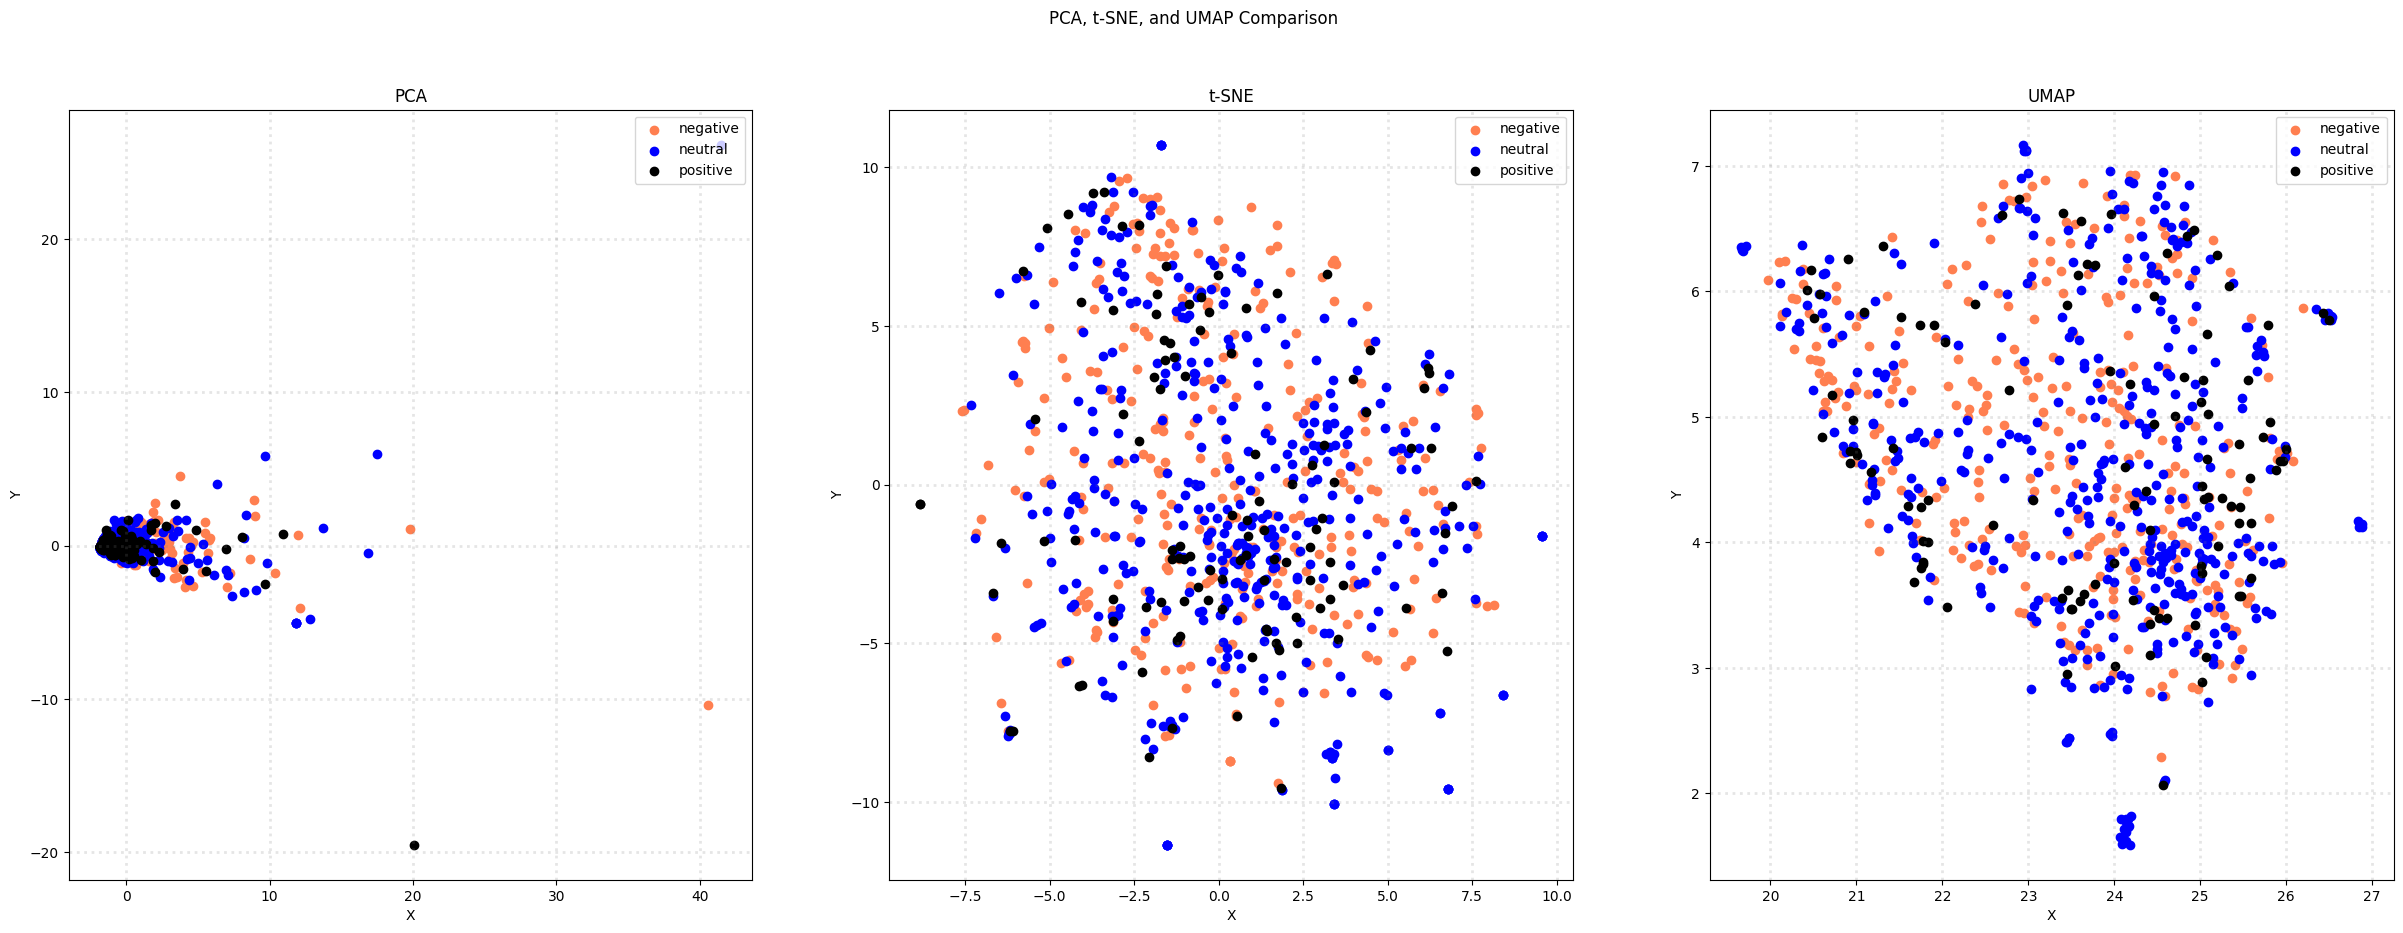

In [41]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment_name'] == category].T[0]
        ys = X_reduced[X['sentiment_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

The results show **no significant improvement** over the `augmented_df` representation: Points remain highly intermixed across sentiment classes. Only small clusters appear in local regions.

#### **>>> Exercise 18:**

In [42]:
X_pca_aug_3d = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug_3d = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug_3d = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

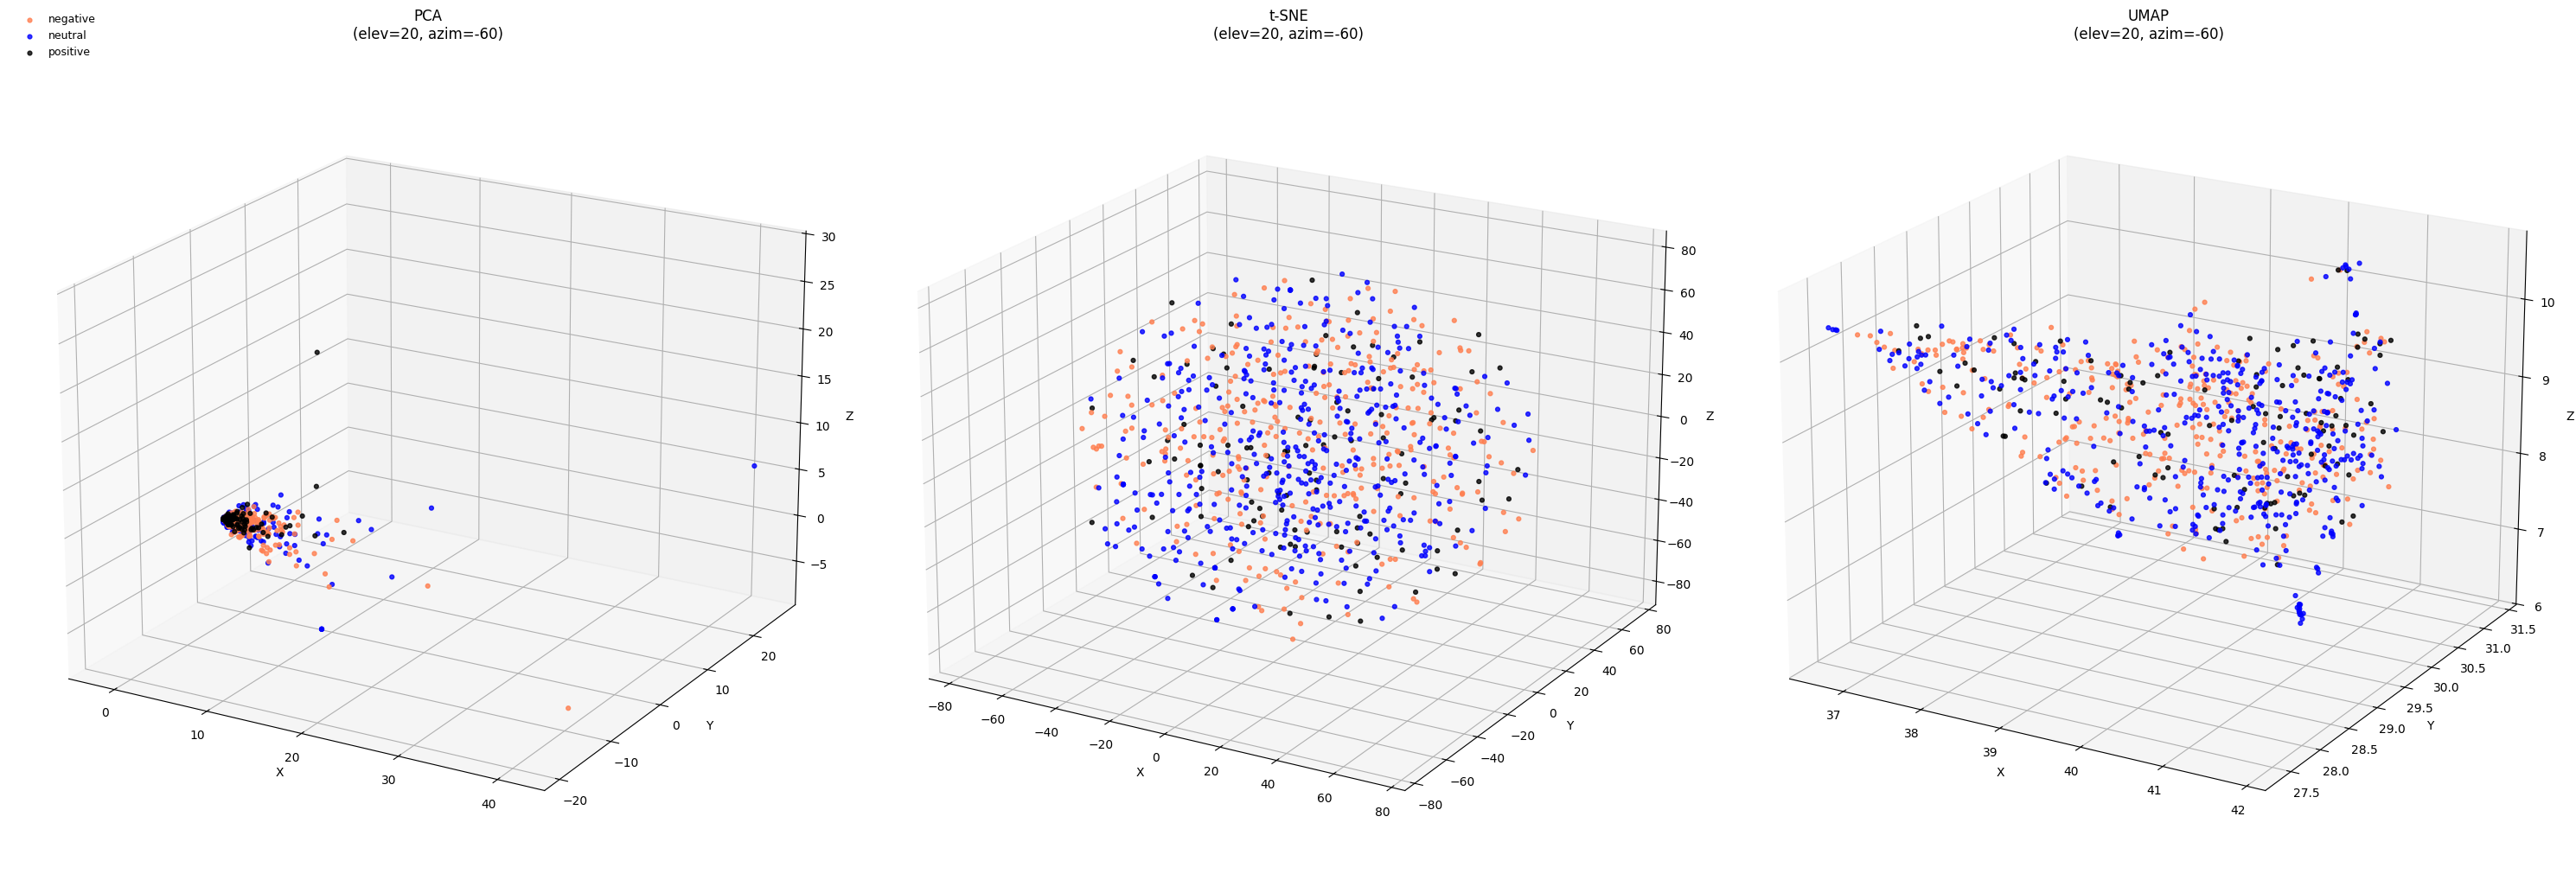

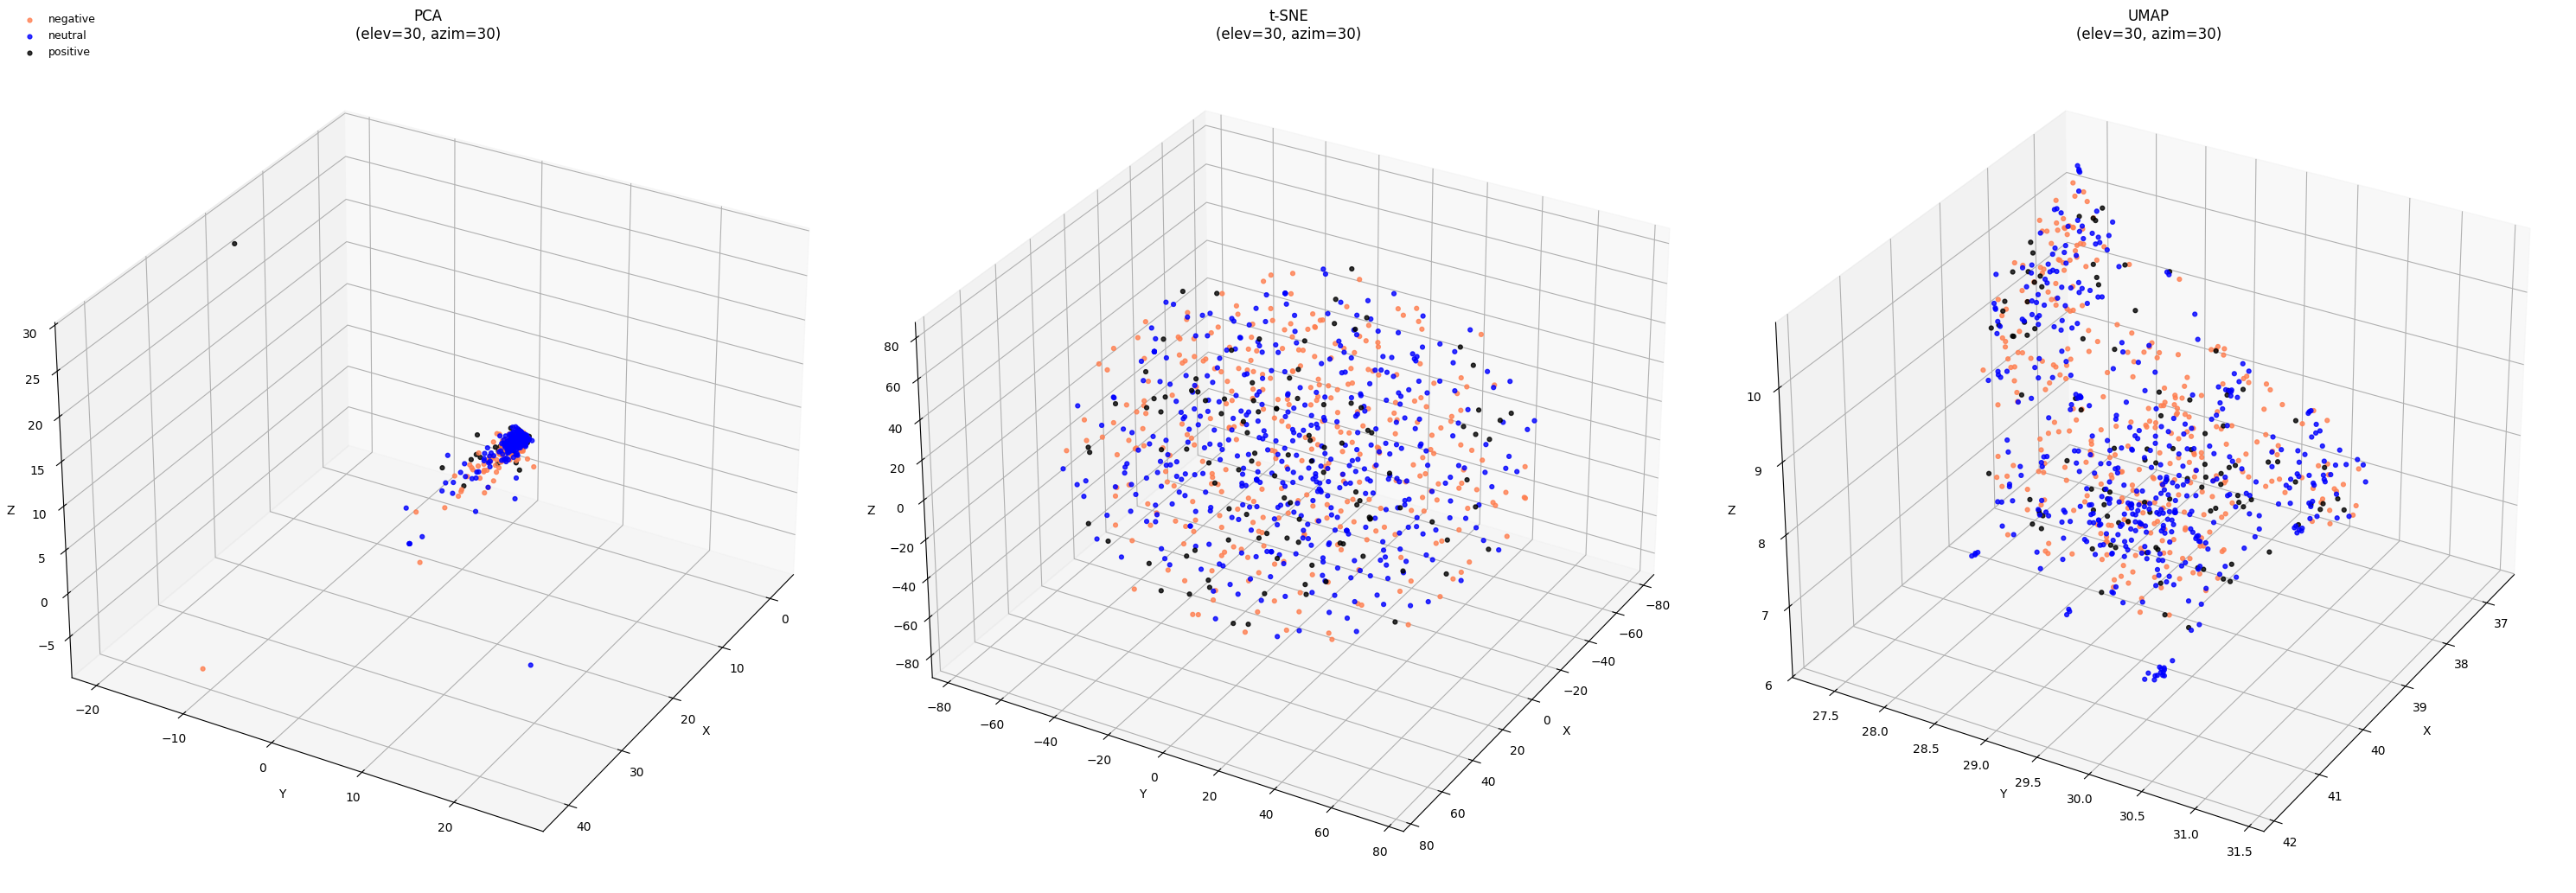

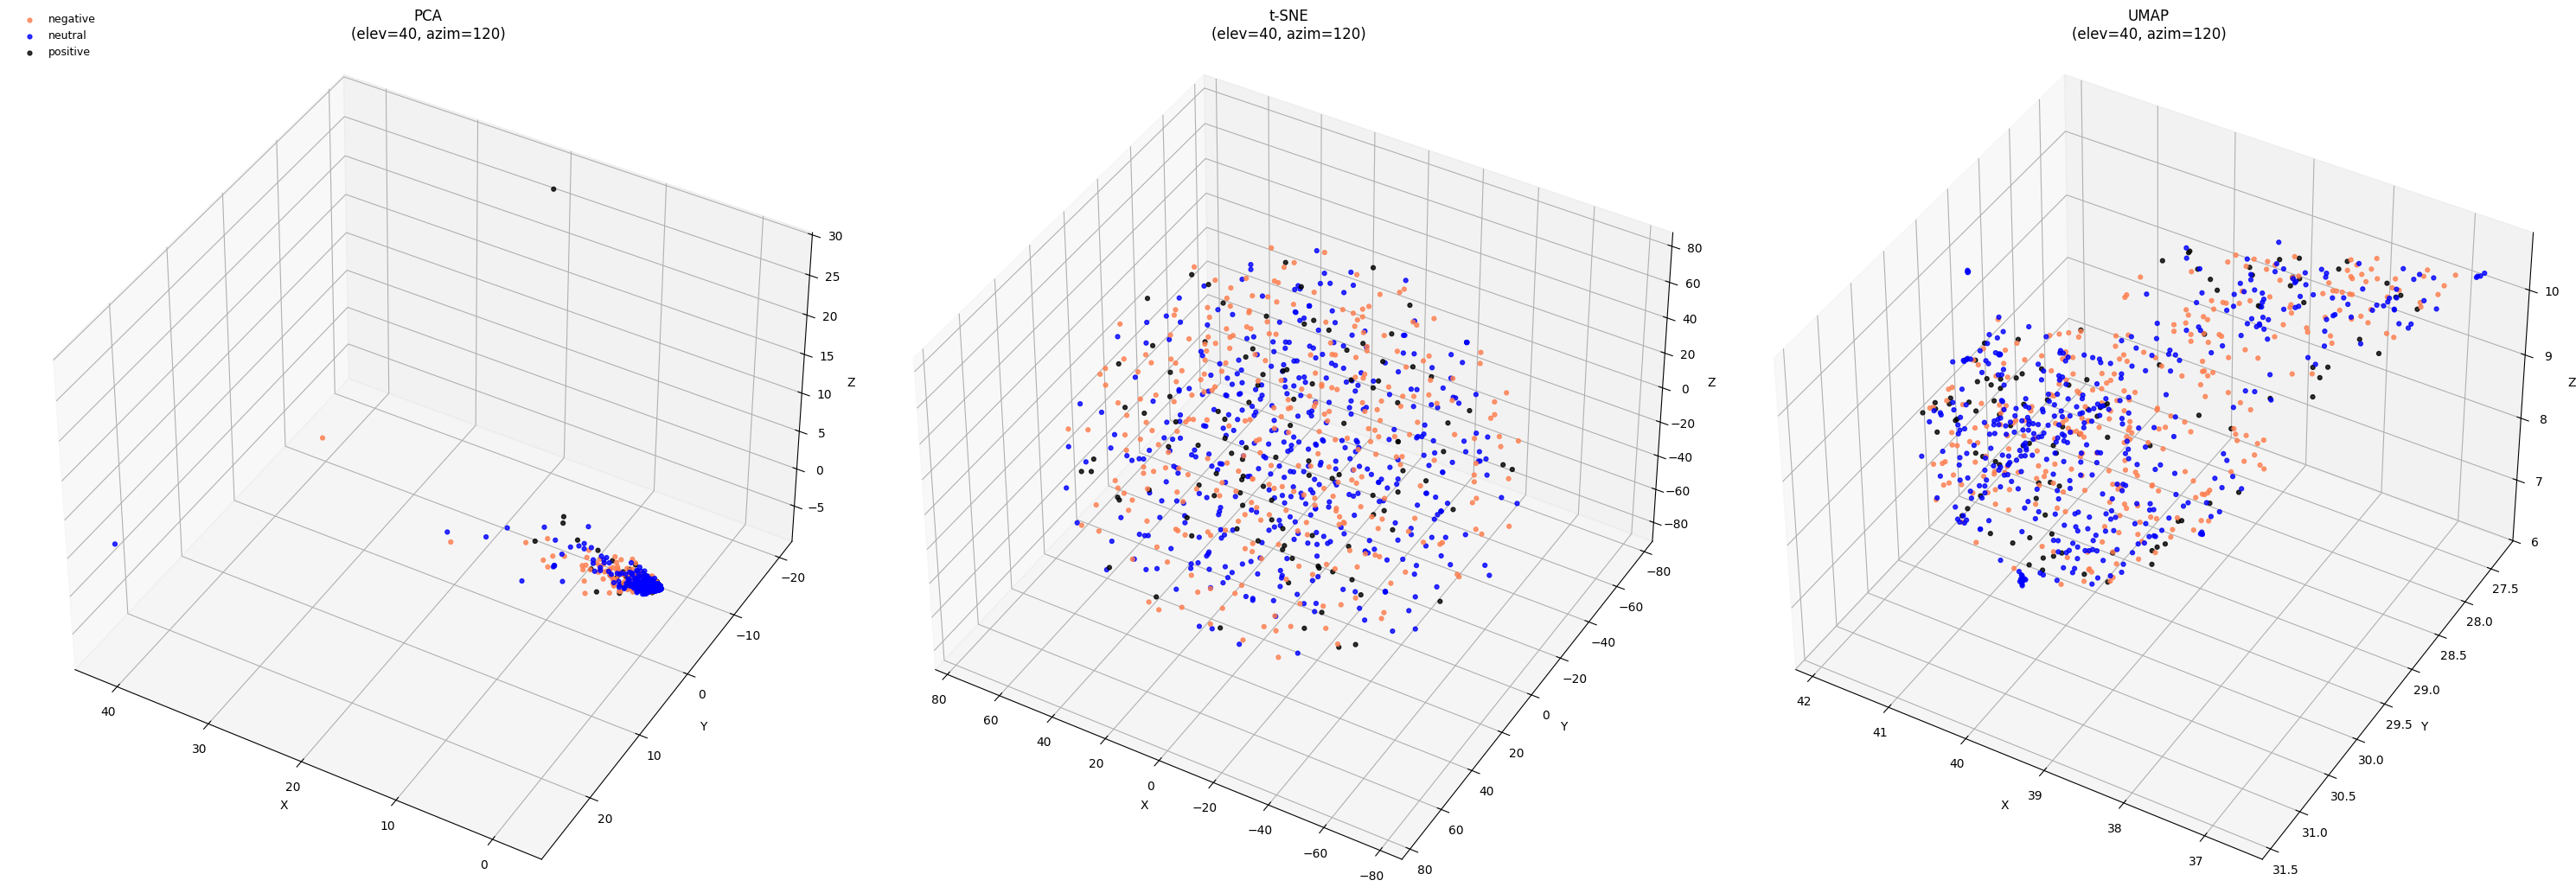

In [43]:
from mpl_toolkits.mplot3d import Axes3D

col = ['coral', 'blue', 'black', 'orange', 'green', 'purple', 'brown', 'teal']
categories = X['sentiment_name'].unique()

def plot_scatter_3d(ax, X_reduced, title, elev, azim):
    for c, category in zip(col, categories):
        mask = (X['sentiment_name'] == category)
        xs = X_reduced[mask].T[0]
        ys = X_reduced[mask].T[1]
        zs = X_reduced[mask].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', s=12, alpha=0.8, label=category)

    ax.set_title(f"{title}\n(elev={elev}, azim={azim})")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.grid(color='gray', linestyle=':', linewidth=0.5, alpha=0.3)
    ax.view_init(elev=elev, azim=azim)

# set 3 different angles
views = [
    (20, -60),
    (30,  30),
    (40, 120),
]

#  plot the result use 3-D plot in each angle( from left to right: PCA / t-SNE / UMAP )
for elev, azim in views:
    fig = plt.figure(figsize=(30, 10))

    ax1 = fig.add_subplot(1, 3, 1, projection='3d')
    plot_scatter_3d(ax1, X_pca_aug_3d, 'PCA', elev, azim)
    ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 1.05), fontsize=9, frameon=False)

    ax2 = fig.add_subplot(1, 3, 2, projection='3d')
    plot_scatter_3d(ax2, X_tsne_aug_3d, 't-SNE', elev, azim)

    ax3 = fig.add_subplot(1, 3, 3, projection='3d')
    plot_scatter_3d(ax3, X_umap_aug_3d, 'UMAP', elev, azim)

    plt.tight_layout()
    plt.show()

#### 6.2 CountVectorizer() + MultinomialNB

In [75]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import classification_report

- w/o augmentation

In [109]:
y = X['sentiment_name']
count_vec = CountVectorizer(stop_words='english', max_df=0.9, min_df=5)
X_count = count_vec.fit_transform(X['text'])
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_count, y, test_size=0.3, random_state=42, stratify=y)

nb_count = MultinomialNB()
nb_count.fit(Xc_train, yc_train)
y_pred_count = nb_count.predict(Xc_test)
print("=== CountVectorizer + MultinomialNB ===")
print(classification_report(yc_test, y_pred_count, digits=3))

=== CountVectorizer + MultinomialNB ===
              precision    recall  f1-score   support

    negative      0.478     0.568     0.519        95
     neutral      0.623     0.598     0.610       127
    positive      0.250     0.152     0.189        33

    accuracy                          0.529       255
   macro avg      0.450     0.439     0.439       255
weighted avg      0.521     0.529     0.522       255



- w/ augmentation (yield in the beginning of 6.)

In [110]:
Xa_train, Xa_test, ya_train, ya_test = train_test_split(augmented_df, y, test_size=0.3, random_state=42, stratify=y)

nb_aug = MultinomialNB()
nb_aug.fit(Xa_train, ya_train)
y_pred_aug = nb_aug.predict(Xa_test)

print("=== CountVectorizer + MultinomialNB (Augmented) ===")
print(classification_report(ya_test, y_pred_aug, digits=3))

=== CountVectorizer + MultinomialNB (Augmented) ===
              precision    recall  f1-score   support

    negative      0.515     0.726     0.603        95
     neutral      0.646     0.575     0.608       127
    positive      0.000     0.000     0.000        33

    accuracy                          0.557       255
   macro avg      0.387     0.434     0.404       255
weighted avg      0.514     0.557     0.527       255



#### <span style="color:red">6.3 TF-IDF + BernoulliNB</span>

- Yield `augmented_df` for the sake of implementation afterwards

In [111]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer() #TF-IDF
X_tfidf = tfidf_vect.fit_transform(X['text'])
terms = tfidf_vect.get_feature_names_out()

X['tokenized_text'] = X['text'].str.split().apply(set)
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())
    pattern_matrix[pattern] = X['tokenized_text'].apply(
        lambda x: 1 if pattern_words.issubset(x) else 0
    )

tdm_df = pd.DataFrame(X_tfidf.toarray(), columns=terms, index=X.index)
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

- w/o augmentation

In [112]:
from sklearn.naive_bayes import BernoulliNB
y = X['sentiment_name']

tfidf_vec = TfidfVectorizer(stop_words='english', max_df=0.9, min_df=5)
X_tfidf = tfidf_vec.fit_transform(X['text'])

Xt_train, Xt_test, yt_train, yt_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42, stratify=y)

#Naive Bayes Classifier
nb = BernoulliNB()
nb.fit(Xt_train, yt_train)
y_pred_tfidf = nb.predict(Xt_test)

print("=== TF-IDF + BernoulliNB ===")
print(classification_report(yt_test, y_pred_tfidf, digits=3))

=== TF-IDF + BernoulliNB ===
              precision    recall  f1-score   support

    negative      0.529     0.474     0.500        95
     neutral      0.592     0.732     0.655       127
    positive      0.077     0.030     0.043        33

    accuracy                          0.545       255
   macro avg      0.400     0.412     0.399       255
weighted avg      0.502     0.545     0.518       255



- w/ augmentation

In [113]:
y = X['sentiment_name']

tfidf_vec = TfidfVectorizer(stop_words='english', max_df=0.9, min_df=5)
X_tfidf = tfidf_vec.fit_transform(X['text'])

Xt_train, Xt_test, yt_train, yt_test = train_test_split(augmented_df, y, test_size=0.3, random_state=42, stratify=y)

#Naive Bayes Classifier
nb_aug = BernoulliNB()
nb_aug.fit(Xt_train, yt_train)
y_pred_tfidf = nb_aug.predict(Xt_test)

print("=== TF-IDF + BernoulliNB (Augmented) ===")
print(classification_report(yt_test, y_pred_tfidf, digits=3))

=== TF-IDF + BernoulliNB (Augmented) ===
              precision    recall  f1-score   support

    negative      0.646     0.326     0.434        95
     neutral      0.547     0.874     0.673       127
    positive      0.250     0.030     0.054        33

    accuracy                          0.561       255
   macro avg      0.481     0.410     0.387       255
weighted avg      0.545     0.561     0.504       255



#### **6.4 Conclusion**

##### 1. Implementation
- **Model 1**: CountVectorizer + MultinomialNB -> Uses raw word frequency (integer counts).
- **Model 2**: TfidfVectorizer + BernoulliNB -> Uses TF-IDF weighted features.
Since **TF-IDF produces continuous and highly sparse features (not ideal for MultinomialNB), the BernoulliNB classifier was chosen instead**, as it works better when features are binary or represent word presence. Additionally, augmented versions of both models were tested by concatenating the word-based features with a binary frequent pattern matrix generated from association-rule mining.

##### 2. Summary
- Both Naive Bayes variants effectively handled sparse text data, but their suitability depended on the feature representation.
  - **MultinomialNB** worked better for **raw word counts**.
  - **BernoulliNB** was more stable for **sparse augmented features**.
- Feature **augmentation** with pattern mining **provided a small accuracy gain but did not significantly improve macro-F1.**


##### 3. Inefficent parts I noticed and how I would improve.
- 1. **Extreme sparsity of the document matrix:** This leads to both lower computational efficiency and poorer classification performance.
  - Improvement: I would manage to reduce sparsity (e.g., removing very rare terms )
- 2. **Class imbalance:** The dataset shows an imbalance among sentiment categories. But I think the issue is often inevitable, since in real-world data we usually don't know the true shape or distribution of classes.
  - Improvement: Resampling minority classes, adjusting class priors, or using a fixed Top-K vocabulary per class to maintain a more balanced token representation.

### 7. Discretization and Binarization

In [54]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()

In [56]:
mlb.fit(X.sentiment)

LabelBinarizer()

In [57]:
X['bin_sentiment'] = mlb.transform(X['sentiment']).tolist()

In [58]:
X[0:9]

,text,sentiment,sentiment_name,tokenized_text,bin_sentiment
0,Calls on retards,0,negative,"{retards, Calls, on}","[1, 0, 0]"
1,Stunt as in like why did they even make a big ...,1,neutral,"{make, even, in, place?, about, the, as, No, f...","[0, 1, 0]"
2,Seeing lots of red in the ticker.,1,neutral,"{the, red, Seeing, of, ticker., in, lots}","[0, 1, 0]"
3,Vision Marine Technologies Inc. is rewriting t...,2,positive,"{Technologies, contribute, into, propelling, u...","[0, 0, 1]"
4,He didn’t say thank you.,0,negative,"{you., say, didn’t, He, thank}","[1, 0, 0]"
5,"Hoping to ejaculate in wet warm puss tonight, ...",1,neutral,"{wish, ejaculate, tonight,, Hoping, warm, luck...","[0, 1, 0]"
6,Trump will respond to china increasing their t...,0,negative,"{fire, respond, starting., Earnings, Powell., ...","[1, 0, 0]"
7,Confirmed not a trap. Its been like this for p...,1,neutral,"{Confirmed, this, of, just, months,, mouth, we...","[0, 1, 0]"
8,Am I the only one seeing the cup & handle brea...,2,positive,"{here?, cup, Day?, Green, Am, breakout, new, w...","[0, 0, 1]"


### 8. Data Exploration

In [62]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[10]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[200]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [63]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["It's a copy/paste from a Bloomberg terminal."]
['Do we have a copy of trump’s kindergarten graduation certificate? Ideally the long form version.']
['I need people to understand this man is NOT stupid. You want him to be so bad but he is NOT. Everything he is currently doing is apart of the plan. The major goal is to crash the economy and the USD and build a new US and USD. Please wake up.']


In [64]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


- I found a very interesting result - there is **no relationship between 1 and 3** ,and I realized that these two document indeed have no related topics or meanings after I read the contents.

In [65]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.109109
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.133631
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\aska9\AppData\Local\Temp\ipykernel_1124\452772485.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
C:\Users\aska9\AppData\Local\Temp\ipykernel_1124\452772485.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
C:\Users\aska9\AppData\Local\Temp\ipykernel_1124\452772485.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operati

### 9. Data Classification

In [16]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
sentiment_mapping = dict(X[['sentiment', 'sentiment_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['sentiment'], test_size=0.3, random_state=42)

In [17]:
X_train

,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X_test

,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
351,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.592156862745098

Classification Report:
               precision    recall  f1-score   support

    negative     0.5854    0.7347    0.6516        98
     neutral     0.6393    0.6446    0.6420       121
    positive     0.1000    0.0278    0.0435        36

    accuracy                         0.5922       255
   macro avg     0.4416    0.4690    0.4457       255
weighted avg     0.5425    0.5922    0.5612       255



#### >>> Exercise 21:

In [21]:
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['sentiment'], test_size=0.3, random_state=42)

In [22]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.6

Classification Report:
               precision    recall  f1-score   support

    negative     0.6000    0.7347    0.6606        98
     neutral     0.6400    0.6612    0.6504       121
    positive     0.1000    0.0278    0.0435        36

    accuracy                         0.6000       255
   macro avg     0.4467    0.4745    0.4515       255
weighted avg     0.5484    0.6000    0.5686       255



As the result, using the augmented TDM has a slightly greater F1-score than using the original one.

#### 9.1 Decision Tree Classifier

In [23]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['sentiment'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.49019607843137253

Classification Report:
               precision    recall  f1-score   support

    negative     0.4878    0.4082    0.4444        98
     neutral     0.5294    0.6694    0.5912       121
    positive     0.2000    0.1111    0.1429        36

    accuracy                         0.4902       255
   macro avg     0.4057    0.3962    0.3928       255
weighted avg     0.4669    0.4902    0.4715       255



#### >>> Exercise 24:
Implement using the augmented data, does the performance improve compared to that obtained with the original TDM? Is it better than Naive Bayes? Provide possible explanations for your observations.

In [24]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['sentiment'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.5215686274509804

Classification Report:
               precision    recall  f1-score   support

    negative     0.5395    0.4184    0.4713        98
     neutral     0.5280    0.7025    0.6028       121
    positive     0.3889    0.1944    0.2593        36

    accuracy                         0.5216       255
   macro avg     0.4854    0.4384    0.4445       255
weighted avg     0.5127    0.5216    0.5038       255



- Augmented TDM slightly improved F1 (0.49 -> 0.522), but still underperformed Naive Bayes (0.600)
- It's possibly due to increased vocabulary diversity ,but it isn't enough to match Naive Bayes, which is better suited for high-dimensional sparse text data and captures word–class relationships more effectively.
- Decision Tree searches for local threshold rules -> unstable in sparse, high-dimensional text space.